# 1. Scrap Data

In [1]:
!pip install vnstock

In [2]:
conda install -c conda-forge ta-lib

Retrieving notices: ...working... done
/ - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime
from vnstock import *

In [4]:
usdindex = pd.read_csv('/kaggle/input/currency/usdindex.csv')
usd_vnd = pd.read_csv('/kaggle/input/currency/USD_VND Historical Data.csv')

In [5]:
usd_vnd = usd_vnd.rename({'Date':'time'},axis=1)
usdindex = usdindex.rename({'Date':'time'},axis=1)
usd_vnd.head()

,time,Price,Open,High,Low,Vol.,Change %
0,05/06/2024,"25,390.5","25,390.0","25,415.0","25,360.0",NaN,-0.09%
1,05/03/2024,"25,412.5","25,415.0","25,420.0","25,410.0",NaN,0.09%
2,05/02/2024,"25,390.0","25,360.0","25,405.0","25,320.0",NaN,0.24%
3,04/26/2024,"25,330.0","25,355.0","25,375.0","25,317.5",NaN,-0.08%
4,04/25/2024,"25,350.0","25,395.0","25,445.0","25,315.0",NaN,-0.22%


In [6]:
usdindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       3748 non-null   object 
 1   Open       3100 non-null   float64
 2   High       3100 non-null   float64
 3   Low        3100 non-null   float64
 4   Close      3100 non-null   float64
 5   Adj Close  3100 non-null   float64
 6   Volume     3100 non-null   float64
dtypes: float64(6), object(1)
memory usage: 205.1+ KB


In [7]:
usd_vnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      3175 non-null   object
 1   Price     3175 non-null   object
 2   Open      3175 non-null   object
 3   High      3175 non-null   object
 4   Low       3175 non-null   object
 5   Vol.      1007 non-null   object
 6   Change %  3175 non-null   object
dtypes: object(7)
memory usage: 173.8+ KB


In [8]:
listing_companies(live=True)

,ticker,organName,organTypeCode,comGroupCode
0,A32,CTCP 32,1,UPCOM
1,AAA,CTCP Nhựa An Phát Xanh,1,HOSE
2,AAH,CTCP Hợp Nhất,1,UPCOM
3,AAM,CTCP Thủy sản MeKong,1,HOSE
4,AAS,CTCP Chứng khoán SmartInvest,4,UPCOM
...,...,...,...,...
1746,YBC,CTCP Xi măng và Khoáng sản Yên Bái,1,UPCOM
1747,YBM,CTCP Khoáng sản Công nghiệp Yên Bái,1,HOSE
1748,YEG,CTCP Tập đoàn Yeah1,1,HOSE
1749,YSVN,Công ty TNHH Chứng khoán Yuanta Việt Nam,4,OTC


In [9]:
df = stock_historical_data(symbol="VNM", start_date="2014-01-01", end_date="2024-05-06", resolution="1D", type="stock", beautify=True, decor=False, source='TCBS')
vn30 = stock_historical_data("VNINDEX", "2014-01-01", "2024-05-06", "1D", "index", source='TCBS')

Time range is 3778 days. Looping through 11 requests
Time range is 3778 days. Looping through 11 requests


In [10]:
df

,time,open,high,low,close,volume,ticker
41,2014-01-02,35950,36490,35950,35950,32520,VNM
42,2014-01-03,35950,36220,35950,36220,30700,VNM
43,2014-01-06,35950,36220,35950,36220,77090,VNM
44,2014-01-07,36220,36220,35950,35950,105870,VNM
45,2014-01-08,35950,36220,35950,36220,38900,VNM
...,...,...,...,...,...,...,...
2623,2024-04-25,64000,64800,63900,64700,1918445,VNM
2624,2024-04-26,64700,65800,64500,65000,2944790,VNM
2625,2024-05-02,65400,65500,64900,65400,2566088,VNM
2626,2024-05-03,65600,66000,65500,65600,1969178,VNM


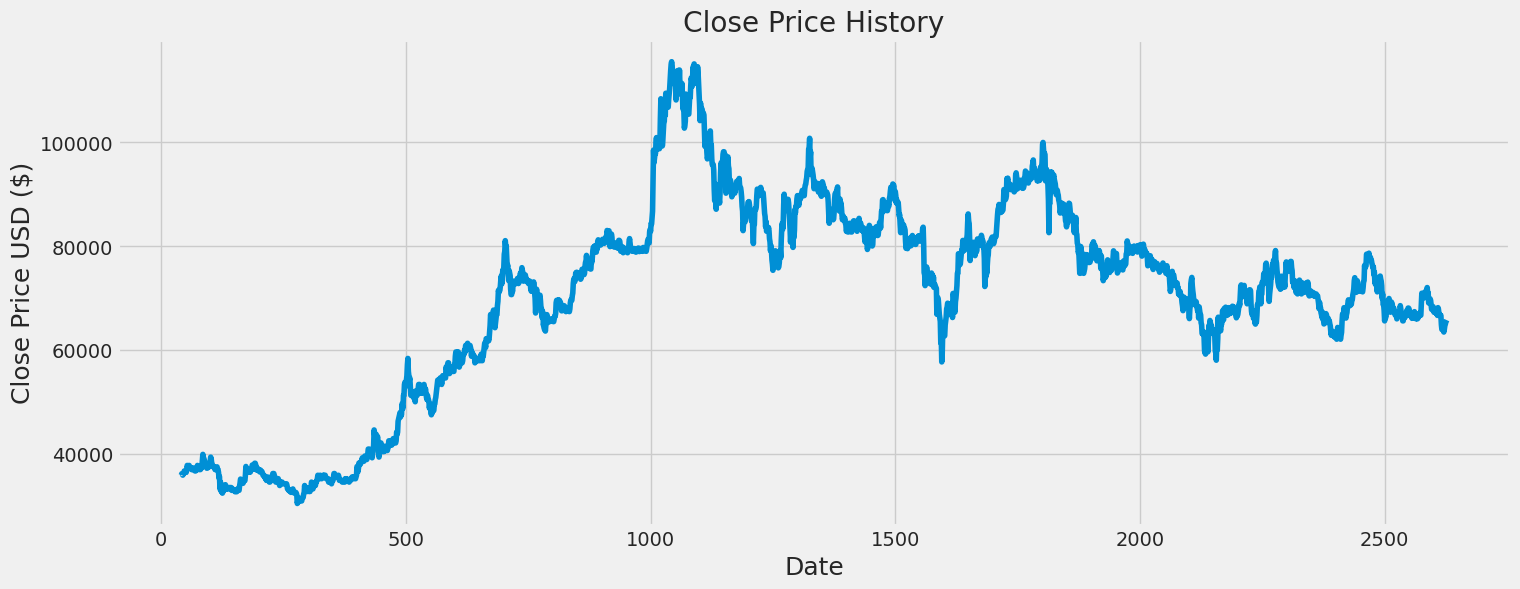

In [11]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

- Currency
- VNINDEX
- Technical Indicators

In [12]:
import pandas as pd
import talib


# Calculate Moving Average (MA) with a window of 5
df['MA_5'] = talib.SMA(df['close'], timeperiod=5)

# Calculate Relative Strength Index (RSI) with a window of 14
df['RSI_14'] = talib.RSI(df['close'], timeperiod=14)

# Calculate Stochastic Oscillator
df['%K'], df['%D'] = talib.STOCH(df['high'], df['low'], df['close'])

# Calculate Moving Average Convergence Divergence (MACD)
macd, signal, _ = talib.MACD(df['close'])
df['MACD'] = macd
df['MACD_Signal'] = signal

# Calculate Bollinger Bands
upper_band, middle_band, lower_band = talib.BBANDS(df['close'])
df['Upper_Band'] = upper_band
df['Middle_Band'] = middle_band
df['Lower_Band'] = lower_band

# Calculate Average True Range (ATR) with a window of 14
df['ATR_14'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14)

# Calculate On-Balance Volume (OBV)
df['OBV'] = talib.OBV(df['close'], df['volume'])

# Print the DataFrame with the calculated indicators
print(df)

            time   open   high    low  close   volume ticker     MA_5  \
41    2014-01-02  35950  36490  35950  35950    32520    VNM      NaN   
42    2014-01-03  35950  36220  35950  36220    30700    VNM      NaN   
43    2014-01-06  35950  36220  35950  36220    77090    VNM      NaN   
44    2014-01-07  36220  36220  35950  35950   105870    VNM      NaN   
45    2014-01-08  35950  36220  35950  36220    38900    VNM  36112.0   
...          ...    ...    ...    ...    ...      ...    ...      ...   
2623  2024-04-25  64000  64800  63900  64700  1918445    VNM  64080.0   
2624  2024-04-26  64700  65800  64500  65000  2944790    VNM  64240.0   
2625  2024-05-02  65400  65500  64900  65400  2566088    VNM  64520.0   
2626  2024-05-03  65600  66000  65500  65600  1969178    VNM  64940.0   
2627  2024-05-06  65800  66400  65500  65800  2264163    VNM  65300.0   

         RSI_14         %K         %D         MACD  MACD_Signal    Upper_Band  \
41          NaN        NaN        NaN     

In [13]:
df['time'] = pd.to_datetime(df['time'])
usdindex['time'] = pd.to_datetime(usdindex['time'])
usd_vnd['time'] = pd.to_datetime(usd_vnd['time'])

In [14]:
usdindex = usdindex.rename({'Close':'usdindex_close'},axis=1)
data = pd.merge(df, usdindex[['time','usdindex_close']], on = 'time', how = 'left')
usd_vnd =usd_vnd.rename({'Price':'usd_vnd_price'},axis=1)
data = pd.merge(data, usd_vnd[['time','usd_vnd_price']], on = 'time', how = 'left')

In [15]:
data

,time,open,high,low,close,volume,ticker,MA_5,RSI_14,%K,%D,MACD,MACD_Signal,Upper_Band,Middle_Band,Lower_Band,ATR_14,OBV,usdindex_close,usd_vnd_price
0,2014-01-02,35950,36490,35950,35950,32520,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32520.0,80.629997,"21,110.0"
1,2014-01-03,35950,36220,35950,36220,30700,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63220.0,80.790001,"21,095.0"
2,2014-01-06,35950,36220,35950,36220,77090,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63220.0,80.650002,"21,100.0"
3,2014-01-07,36220,36220,35950,35950,105870,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-42650.0,80.830002,"21,095.0"
4,2014-01-08,35950,36220,35950,36220,38900,VNM,36112.0,NaN,NaN,NaN,NaN,NaN,36376.544892,36112.0,35847.455108,NaN,-3750.0,81.040001,"21,100.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,2024-04-25,64000,64800,63900,64700,1918445,VNM,64080.0,38.503491,43.754313,32.906532,-1139.613220,-991.709973,64853.563184,64080.0,63306.436816,998.617873,-57819349.0,105.599998,"25,350.0"
2583,2024-04-26,64700,65800,64500,65000,2944790,VNM,64240.0,41.263990,59.584860,44.097657,-1052.784664,-1003.924911,65317.775487,64240.0,63162.224513,1020.145168,-54874559.0,105.940002,"25,330.0"
2584,2024-05-02,65400,65500,64900,65400,2566088,VNM,64520.0,44.820610,75.091575,59.476916,-940.850216,-991.309972,65890.547336,64520.0,63149.452664,990.134798,-52308471.0,105.300003,"25,390.0"
2585,2024-05-03,65600,66000,65500,65600,1969178,VNM,64940.0,46.562940,79.282051,71.319495,-826.475930,-958.343164,66068.538878,64940.0,63811.461122,962.268027,-50339293.0,NaN,"25,412.5"


2. EDA and Data Cleaning

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            2587 non-null   datetime64[ns]
 1   open            2587 non-null   int64         
 2   high            2587 non-null   int64         
 3   low             2587 non-null   int64         
 4   close           2587 non-null   int64         
 5   volume          2587 non-null   int64         
 6   ticker          2587 non-null   object        
 7   MA_5            2583 non-null   float64       
 8   RSI_14          2573 non-null   float64       
 9   %K              2579 non-null   float64       
 10  %D              2579 non-null   float64       
 11  MACD            2554 non-null   float64       
 12  MACD_Signal     2554 non-null   float64       
 13  Upper_Band      2583 non-null   float64       
 14  Middle_Band     2583 non-null   float64       
 15  Lowe

In [17]:
data.isna().sum()/len(data)

time              0.000000
open              0.000000
high              0.000000
low               0.000000
close             0.000000
volume            0.000000
ticker            0.000000
MA_5              0.001546
RSI_14            0.005412
%K                0.003092
%D                0.003092
MACD              0.012756
MACD_Signal       0.012756
Upper_Band        0.001546
Middle_Band       0.001546
Lower_Band        0.001546
ATR_14            0.005412
OBV               0.000000
usdindex_close    0.030924
usd_vnd_price     0.000000
dtype: float64

In [18]:
data = data.ffill().bfill()

In [19]:
data.isna().sum()

time              0
open              0
high              0
low               0
close             0
volume            0
ticker            0
MA_5              0
RSI_14            0
%K                0
%D                0
MACD              0
MACD_Signal       0
Upper_Band        0
Middle_Band       0
Lower_Band        0
ATR_14            0
OBV               0
usdindex_close    0
usd_vnd_price     0
dtype: int64

In [20]:
data.set_index('time',inplace=True)
data.drop(columns=['ticker'],inplace=True)
data = data.replace(',', '', regex=True).astype(float)
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

2070

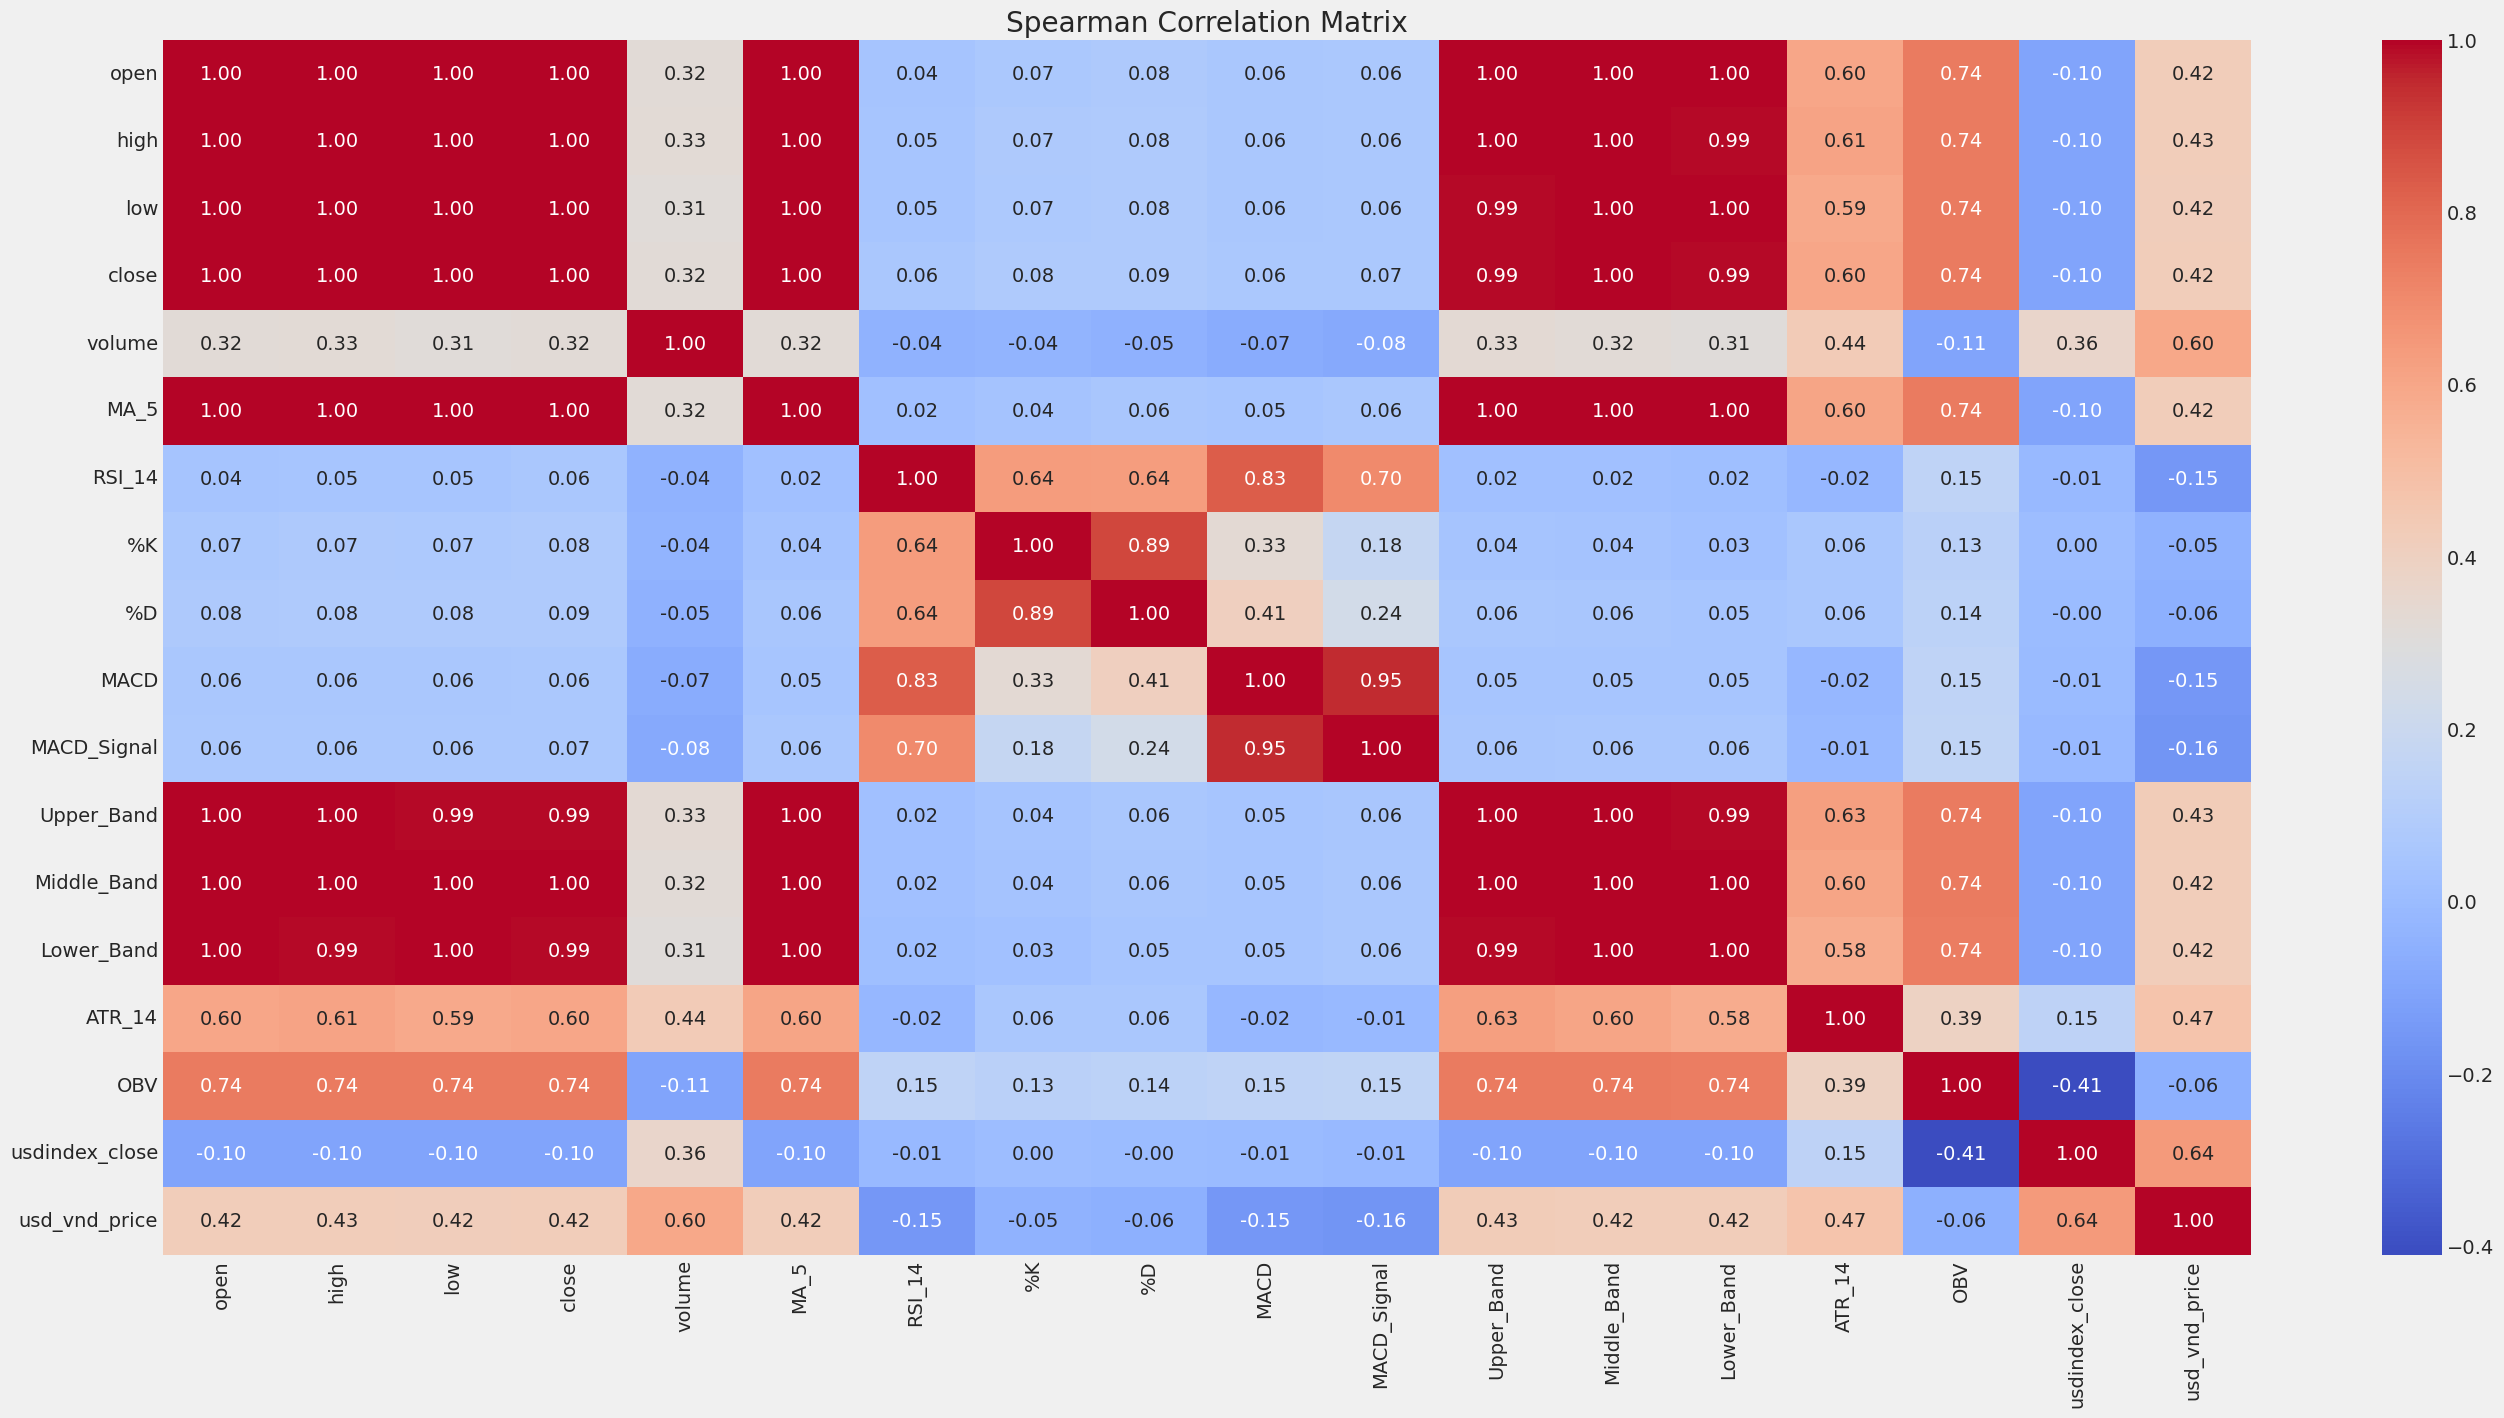

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Spearman correlation matrix
correlation_matrix = data.corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

In [22]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Assuming X is your feature matrix and y is your target variable

# Initialize SelectKBest with Fischer Score (chi2) as the scoring function
selector = SelectKBest(score_func=f_regression, k='all')

# Fit selector to your data

selector.fit(data.drop(columns=['close']), data['close'])

# Get the Fischer scores and p-values for each feature
fischer_scores = selector.scores_
p_values = selector.pvalues_

# Optionally, you can also get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)


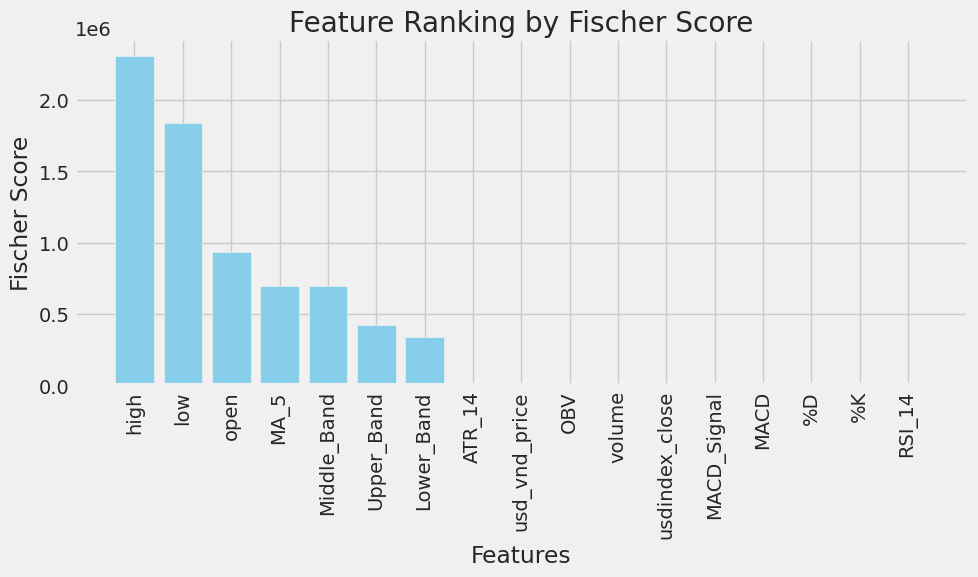

In [23]:
# Sort features based on Fischer scores
sorted_indices = np.argsort(fischer_scores)[::-1]  # Sort in descending order
sorted_scores = fischer_scores[sorted_indices]
feature_names = data.drop(columns=['close']).columns
sorted_features = np.array(feature_names)[sorted_indices]  # Assuming you have feature names

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, color='skyblue')
plt.xticks(range(len(sorted_scores)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Fischer Score')
plt.title('Feature Ranking by Fischer Score')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

selected = dataset[:,[0, 1, 2, 3, 6, 12, 13, 14]]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected)

scaled_data

array([[0.06430338, 0.06506081, 0.06487643, ..., 0.06181888, 0.07198281,
        0.05704861],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.06181888, 0.07198281,
        0.05704861],
       [0.06430338, 0.06187271, 0.06487643, ..., 0.06181888, 0.07198281,
        0.05704861],
       ...,
       [0.41114121, 0.4076042 , 0.40886407, ..., 0.4020263 , 0.40220231,
        0.21017758],
       [0.41349664, 0.41350809, 0.41599335, ..., 0.40705612, 0.41020935,
        0.20045078],
       [0.41585208, 0.4182312 , 0.41599335, ..., 0.41136739, 0.41853727,
        0.19889832]])

In [25]:
scaled_data.shape

(2587, 8)

Split Data

In [26]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Slice entire features (all columns)
    y_train.append(train_data[i, 3]) 
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to include all features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], train_data.shape[1]))

[array([[0.06430338, 0.06506081, 0.06487643, 0.06418244, 0.66520422,
        0.06181888, 0.07198281, 0.05704861],
       [0.06430338, 0.06187271, 0.06487643, 0.06735629, 0.66520422,
        0.06181888, 0.07198281, 0.05704861],
       [0.06430338, 0.06187271, 0.06487643, 0.06735629, 0.66520422,
        0.06181888, 0.07198281, 0.05704861],
       [0.06748322, 0.06187271, 0.06487643, 0.06418244, 0.66520422,
        0.06181888, 0.07198281, 0.05704861],
       [0.06430338, 0.06187271, 0.06487643, 0.06735629, 0.66520422,
        0.06181888, 0.07198281, 0.05704861],
       [0.06748322, 0.06187271, 0.06487643, 0.06735629, 0.66520422,
        0.06246557, 0.07322309, 0.05704861],
       [0.06748322, 0.07131893, 0.0680846 , 0.07358646, 0.66520422,
        0.063735  , 0.07080709, 0.05704861],
       [0.07066305, 0.06813083, 0.07129278, 0.07053015, 0.66520422,
        0.06438169, 0.07118579, 0.05704861],
       [0.07066305, 0.06813083, 0.0680846 , 0.07053015, 0.66520422,
        0.06567507, 0.07426

In [27]:
x_train.shape

(2010, 60, 8)

In [28]:
y_train.shape

(2010,)

# 3. Model Building

In [29]:
pip install keras --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [30]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Xây dựng mô hình GRU
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(GRU(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

2024-05-07 05:02:56.549853: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 05:02:56.549943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 05:02:56.691901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1055
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3214e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3907e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7775e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8407e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6225e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3637e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4164e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4731e-04
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1402e-04
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1377e-04
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4810e-04
Epoch 15/100
32/32 ━━━

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 128)        │        52,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,675 (1.05 MB)

 Trainable params: 91,891 (358.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 183,784 (717.91 KB)

4. Evaluation

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# def evaluate_sliding_windows_lstm(model, x_test, y_test, scaled_data, scaler, training_data_len):
#     for i in range(len(x_test)):
#         # Dự báo
#         window_prediction = model.predict(np.array([x_test[i]]))
        
#         # Chuyển đổi dự báo về dạng gốc
#         scaled_data[training_data_len + i, 3] = window_prediction.flatten()
#         inverse_data_lstm = scaler.inverse_transform(scaled_data)
#         window_prediction = inverse_data_lstm[training_data_len + i, 3]
        
#         # Chỉ số đo lường
#         rmse_window = np.sqrt(mean_squared_error([y_test[i]], [window_prediction]))
#         mae_window = mean_absolute_error([y_test[i]], [window_prediction])
#         mape_window = np.abs((y_test[i] - window_prediction) / y_test[i]) * 100
        
#         # Hiển thị kết quả
#         print(f"LSTM Window {i+1}:")
#         print("RMSE:", rmse_window)
#         print("MAE:", mae_window)
#         print("MAPE:", mape_window)
#         print()

def evaluate_sliding_windows_gru(model, x_test, y_test, scaled_data, scaler, training_data_len):
    for i in range(len(x_test)):
        # Dự báo
        window_prediction = model.predict(np.array([x_test[i]]))
        
        # Chuyển đổi dự báo về dạng gốc
        scaled_data[training_data_len + i, 3] = window_prediction.flatten()
        inverse_data_gru = scaler.inverse_transform(scaled_data)
        window_prediction = inverse_data_gru[training_data_len + i, 3]
        
        # Chỉ số đo lường
        rmse_window = np.sqrt(mean_squared_error([y_test[i]], [window_prediction]))
        mae_window = mean_absolute_error([y_test[i]], [window_prediction])
        mape_window = np.abs((y_test[i] - window_prediction) / y_test[i]) * 100
        
        # Hiển thị kết quả
        print(f"GRU Window {i+1}:")
        print("RMSE:", rmse_window)
        print("MAE:", mae_window)
        print("MAPE:", mape_window)
        print()


In [33]:
from sklearn.metrics import mean_absolute_error

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, 3]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 8 ))

scaled = scaled_data

predictions = model.predict(x_test)

scaled[training_data_len:, 3] = predictions.flatten()
inverse_data = scaler.inverse_transform(scaled)
predictions = inverse_data[training_data_len:, 3]

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)
# Calculate MAE
mae = mean_absolute_error(predictions, y_test)
print("MAE:", mae)

# Calculate MAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE:", mape)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE: 999.6155463485135
MAE: 747.8966517602913
MAPE: 1.0817010284458453


In [34]:
evaluate_sliding_windows_gru(model, x_test, y_test, scaled_data, scaler, training_data_len)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 1:
RMSE: 484.5044410228729
MAE: 484.5044410228729
MAPE: 0.7006571815225928

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 2:
RMSE: 508.16036105155945
MAE: 508.16036105155945
MAPE: 0.7310607985204424

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 3:
RMSE: 701.0834184288979
MAE: 701.0834184288979
MAPE: 1.0204998812647712

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 4:
RMSE: 175.18150717020035
MAE: 175.18150717020035
MAPE: 0.2543285528022653



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 5:
RMSE: 569.9579605460167
MAE: 569.9579605460167
MAPE: 0.8220942745507236

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 6:
RMSE: 789.6838793158531
MAE: 789.6838793158531
MAPE: 1.1540024540637925

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 7:
RMSE: 377.33002334833145
MAE: 377.33002334833145
MAPE: 0.5543264629768347

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 8:
RMSE: 417.52168595790863
MAE: 417.52168595790863
MAPE: 0.618275856593971



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 9:
RMSE: 892.621308863163
MAE: 892.621308863163
MAPE: 1.306147657101497

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 10:
RMSE: 2091.6500839591026
MAE: 2091.6500839591026
MAPE: 3.1605471199140265

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 11:
RMSE: 1867.1741703152657
MAE: 1867.1741703152657
MAPE: 2.732183450856403

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 12:
RMSE: 549.8939114809036
MAE: 549.8939114809036
MAPE: 0.8142957374217439



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 13:
RMSE: 630.3179576992989
MAE: 630.3179576992989
MAPE: 0.9421793089675619

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 14:
RMSE: 85.66389948129654
MAE: 85.66389948129654
MAPE: 0.12822017584388046

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 15:
RMSE: 1269.9085912108421
MAE: 1269.9085912108421
MAPE: 1.9453256605558245

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 16:
RMSE: 414.66858446598053
MAE: 414.66858446598053
MAPE: 0.6387378072488917



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 17:
RMSE: 1566.465060710907
MAE: 1566.465060710907
MAPE: 2.478191837859369

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 18:
RMSE: 78.6034768819809
MAE: 78.6034768819809
MAPE: 0.12435291390916137

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 19:
RMSE: 33.087468445301056
MAE: 33.087468445301056
MAPE: 0.05249479366222601

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 20:
RMSE: 732.7403798699379
MAE: 732.7403798699379
MAPE: 1.152651218923923



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 21:
RMSE: 790.7745525240898
MAE: 790.7745525240898
MAPE: 1.2636218480730104

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 22:
RMSE: 2644.268722832203
MAE: 2644.268722832203
MAPE: 4.415946430915502

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 23:
RMSE: 1006.8785244226456
MAE: 1006.8785244226456
MAPE: 1.691664187538047

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 24:
RMSE: 427.6675471663475
MAE: 427.6675471663475
MAPE: 0.7218017673693629



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 25:
RMSE: 3826.60287886858
MAE: 3826.60287886858
MAPE: 6.071081832252228

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 26:
RMSE: 714.1821980476379
MAE: 714.1821980476379
MAPE: 1.1282499179267582

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 27:
RMSE: 854.1133853793144
MAE: 854.1133853793144
MAPE: 1.3747197575717276

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 28:
RMSE: 454.03521597385406
MAE: 454.03521597385406
MAPE: 0.7404357729514907



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 29:
RMSE: 1359.0041214227676
MAE: 1359.0041214227676
MAPE: 2.2763888131034635

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 30:
RMSE: 2127.8466111421585
MAE: 2127.8466111421585
MAPE: 3.429797890300062

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 31:
RMSE: 3051.9731807112694
MAE: 3051.9731807112694
MAPE: 4.714272974113393

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 32:
RMSE: 24.934624433517456
MAE: 24.934624433517456
MAPE: 0.03883897886840725



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 33:
RMSE: 1949.5362997055054
MAE: 1949.5362997055054
MAPE: 2.965976418234452

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 34:
RMSE: 441.87430769205093
MAE: 441.87430769205093
MAPE: 0.6768907899694407

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 35:
RMSE: 152.24632799625397
MAE: 152.24632799625397
MAPE: 0.235821449808324

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 36:
RMSE: 520.794239282608
MAE: 520.794239282608
MAPE: 0.804452091139202



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 37:
RMSE: 421.0785666704178
MAE: 421.0785666704178
MAPE: 0.6577399938618501

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 38:
RMSE: 590.2364081144333
MAE: 590.2364081144333
MAPE: 0.932442982803212

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 39:
RMSE: 547.0688253641129
MAE: 547.0688253641129
MAPE: 0.8581471770417456

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 40:
RMSE: 75.73178499937057
MAE: 75.73178499937057
MAPE: 0.1191313276692946



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 41:
RMSE: 685.4267928004265
MAE: 685.4267928004265
MAPE: 1.0721520300335157

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 42:
RMSE: 421.2571918964386
MAE: 421.2571918964386
MAPE: 0.6664407402253418

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 43:
RMSE: 430.21920025348663
MAE: 430.21920025348663
MAPE: 0.6874707578355491

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 44:
RMSE: 2544.768952727318
MAE: 2544.768952727318
MAPE: 4.256178211619532



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 45:
RMSE: 618.8381630182266
MAE: 618.8381630182266
MAPE: 1.0397146556085797

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 46:
RMSE: 1435.9063145518303
MAE: 1435.9063145518303
MAPE: 2.472290486487311

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 47:
RMSE: 2898.907754123211
MAE: 2898.907754123211
MAPE: 4.734456563977154

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 48:
RMSE: 713.2472401857376
MAE: 713.2472401857376
MAPE: 1.1875578424670956



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 49:
RMSE: 1982.288344502449
MAE: 1982.288344502449
MAPE: 3.190549403673667

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 50:
RMSE: 4758.173920214176
MAE: 4758.173920214176
MAPE: 7.17024400273384

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 51:
RMSE: 1467.8299787640572
MAE: 1467.8299787640572
MAPE: 2.3089979216046204

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 52:
RMSE: 17.694042325019836
MAE: 17.694042325019836
MAPE: 0.027794599945051582



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 53:
RMSE: 1039.5032408237457
MAE: 1039.5032408237457
MAPE: 1.6146619873308776

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 54:
RMSE: 170.10070538520813
MAE: 170.10070538520813
MAPE: 0.2657034714463021

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 55:
RMSE: 217.73749142885208
MAE: 217.73749142885208
MAPE: 0.34154900616290523

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 56:
RMSE: 1163.1842639446259
MAE: 1163.1842639446259
MAPE: 1.7867928292978785



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 57:
RMSE: 61.37397348880768
MAE: 61.37397348880768
MAPE: 0.0944069735253156

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 58:
RMSE: 885.0212171673775
MAE: 885.0212171673775
MAPE: 1.3336666925367353

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 59:
RMSE: 1398.6540177464485
MAE: 1398.6540177464485
MAPE: 2.0684028656410067

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 60:
RMSE: 1614.177469611168
MAE: 1614.177469611168
MAPE: 2.452411834717666



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 61:
RMSE: 124.49134409427643
MAE: 124.49134409427643
MAPE: 0.18899551251598062

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 62:
RMSE: 2195.8332347869873
MAE: 2195.8332347869873
MAPE: 3.228691714140549

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 63:
RMSE: 373.16210329532623
MAE: 373.16210329532623
MAPE: 0.5486871096828794

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 64:
RMSE: 89.77064162492752
MAE: 89.77064162492752
MAPE: 0.1319962382369174



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 65:
RMSE: 177.64685302972794
MAE: 177.64685302972794
MAPE: 0.2601359687065865

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 66:
RMSE: 751.8208000063896
MAE: 751.8208000063896
MAPE: 1.113148948780559

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 67:
RMSE: 160.74222296476364
MAE: 160.74222296476364
MAPE: 0.23831315487733676

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 68:
RMSE: 813.9873546361923
MAE: 813.9873546361923
MAPE: 1.22018790981291



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 69:
RMSE: 18.212580382823944
MAE: 18.212580382823944
MAPE: 0.02726434189045501

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 70:
RMSE: 1046.111782193184
MAE: 1046.111782193184
MAPE: 1.5424827221957886

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 71:
RMSE: 330.61243921518326
MAE: 330.61243921518326
MAPE: 0.4861232748348526

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 72:
RMSE: 216.81194484233856
MAE: 216.81194484233856
MAPE: 0.31790607748143485



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 73:
RMSE: 942.9032722115517
MAE: 942.9032722115517
MAPE: 1.40563994068508

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 74:
RMSE: 1092.9266035556793
MAE: 1092.9266035556793
MAPE: 1.6091381088864536

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 75:
RMSE: 501.20363414287567
MAE: 501.20363414287567
MAPE: 0.7471729787460878

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
GRU Window 76:
RMSE: 401.42824053764343
MAE: 401.42824053764343
MAPE: 0.5968305687446379



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 77:
RMSE: 648.0545780062675
MAE: 648.0545780062675
MAPE: 0.9580936990039437

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 78:
RMSE: 431.65285140275955
MAE: 431.65285140275955
MAPE: 0.636468374229961

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 79:
RMSE: 777.2193777561188
MAE: 777.2193777561188
MAPE: 1.1349582034990053

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 80:
RMSE: 173.54726821184158
MAE: 173.54726821184158
MAPE: 0.2537982863583527



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 81:
RMSE: 144.82250541448593
MAE: 144.82250541448593
MAPE: 0.2117907362013541

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 82:
RMSE: 178.6913898587227
MAE: 178.6913898587227
MAPE: 0.2616655291532035

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 83:
RMSE: 352.6877626776695
MAE: 352.6877626776695
MAPE: 0.521418927672486

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 84:
RMSE: 8.372459709644318
MAE: 8.372459709644318
MAPE: 0.012447903225757236



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 85:
RMSE: 300.68627536296844
MAE: 300.68627536296844
MAPE: 0.4482502614236262

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 86:
RMSE: 909.4364327192307
MAE: 909.4364327192307
MAPE: 1.3465152986663171

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 87:
RMSE: 966.9171860814095
MAE: 966.9171860814095
MAPE: 1.4597179741567172

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 88:
RMSE: 1158.1090673804283
MAE: 1158.1090673804283
MAPE: 1.728779022810014



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 89:
RMSE: 8.080066442489624
MAE: 8.080066442489624
MAPE: 0.012130410512670204

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 90:
RMSE: 644.7082644701004
MAE: 644.7082644701004
MAPE: 0.9638335542982515

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 91:
RMSE: 1000.5781519412994
MAE: 1000.5781519412994
MAPE: 1.4792698875536656

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 92:
RMSE: 1017.0538574457169
MAE: 1017.0538574457169
MAPE: 1.4873557435591063



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 93:
RMSE: 867.7152848243713
MAE: 867.7152848243713
MAPE: 1.2568297868255667

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 94:
RMSE: 167.13071316480637
MAE: 167.13071316480637
MAPE: 0.24341787527644387

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 95:
RMSE: 2164.622986614704
MAE: 2164.622986614704
MAPE: 3.0651699045804364

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 96:
RMSE: 2084.1068357229233
MAE: 2084.1068357229233
MAPE: 2.8789982535197174



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 97:
RMSE: 451.68923258781433
MAE: 451.68923258781433
MAPE: 0.6223329189691573

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 98:
RMSE: 661.5897932648659
MAE: 661.5897932648659
MAPE: 0.9234921737365521

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 99:
RMSE: 747.1762889623642
MAE: 747.1762889623642
MAPE: 1.062235270063071

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 100:
RMSE: 1089.4733875989914
MAE: 1089.4733875989914
MAPE: 1.5385869052379486



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 101:
RMSE: 99.92853581905365
MAE: 99.92853581905365
MAPE: 0.14206502106774757

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 102:
RMSE: 2092.1200880408287
MAE: 2092.1200880408287
MAPE: 2.897673252134112

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 103:
RMSE: 592.5487771630287
MAE: 592.5487771630287
MAPE: 0.8175341848275782

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 104:
RMSE: 1944.1209104657173
MAE: 1944.1209104657173
MAPE: 2.756445357246161



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 105:
RMSE: 240.16532182693481
MAE: 240.16532182693481
MAPE: 0.3405151309044872

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 106:
RMSE: 459.5027816295624
MAE: 459.5027816295624
MAPE: 0.6498412977366177

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 107:
RMSE: 403.9706611633301
MAE: 403.9706611633301
MAPE: 0.5758669439249181

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 108:
RMSE: 572.8934016823769
MAE: 572.8934016823769
MAPE: 0.8122691077305783



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 109:
RMSE: 1342.0792457461357
MAE: 1342.0792457461357
MAPE: 1.9467351983552883

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 110:
RMSE: 727.5325670838356
MAE: 727.5325670838356
MAPE: 1.0481667873272376

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 111:
RMSE: 1584.5153918862343
MAE: 1584.5153918862343
MAPE: 2.2377000309083948

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 112:
RMSE: 498.47839534282684
MAE: 498.47839534282684
MAPE: 0.7115021343745744



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 113:
RMSE: 831.6951167583466
MAE: 831.6951167583466
MAPE: 1.1777047815892758

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 114:
RMSE: 1355.8773157000542
MAE: 1355.8773157000542
MAPE: 1.8926260688163794

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 115:
RMSE: 218.75446617603302
MAE: 218.75446617603302
MAPE: 0.30535240951428394

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 116:
RMSE: 88.9201220870018
MAE: 88.9201220870018
MAPE: 0.12443342021690709



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 117:
RMSE: 2252.922966480255
MAE: 2252.922966480255
MAPE: 3.2679474419498913

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 118:
RMSE: 1283.7790369987488
MAE: 1283.7790369987488
MAPE: 1.9033047249796127

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 119:
RMSE: 657.3626691102982
MAE: 657.3626691102982
MAPE: 0.9827517851850773

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 120:
RMSE: 976.176016330719
MAE: 976.176016330719
MAPE: 1.4412756774408964



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 121:
RMSE: 217.2688740491867
MAE: 217.2688740491867
MAPE: 0.32254880351720117

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 122:
RMSE: 951.2617787718773
MAE: 951.2617787718773
MAPE: 1.438037458460888

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 123:
RMSE: 80.54711639881134
MAE: 80.54711639881134
MAPE: 0.12194870007390059

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 124:
RMSE: 1017.5851574540138
MAE: 1017.5851574540138
MAPE: 1.5253862351281873



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 125:
RMSE: 1197.6504534482956
MAE: 1197.6504534482956
MAPE: 1.8363239089976933

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 126:
RMSE: 143.883436024189
MAE: 143.883436024189
MAPE: 0.22125701372318773

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 127:
RMSE: 942.0611083507538
MAE: 942.0611083507538
MAPE: 1.4343195924950576

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 128:
RMSE: 122.1477335691452
MAE: 122.1477335691452
MAPE: 0.18677023481520671



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 129:
RMSE: 1307.3325750231743
MAE: 1307.3325750231743
MAPE: 1.9597250412579437

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 130:
RMSE: 2150.727744102478
MAE: 2150.727744102478
MAPE: 3.1278763003235572

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 131:
RMSE: 333.62149745225906
MAE: 333.62149745225906
MAPE: 0.48393022548920667

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 132:
RMSE: 166.3392275571823
MAE: 166.3392275571823
MAPE: 0.24093167375026409



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 133:
RMSE: 2376.9519141316414
MAE: 2376.9519141316414
MAPE: 3.335136683221049

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
GRU Window 134:
RMSE: 159.36470091342926
MAE: 159.36470091342926
MAPE: 0.22332497325312398

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 135:
RMSE: 918.5018315911293
MAE: 918.5018315911293
MAPE: 1.2721632016497635



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
GRU Window 136:
RMSE: 138.53463053703308
MAE: 138.53463053703308
MAPE: 0.1931065382450977

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
GRU Window 137:
RMSE: 2716.058427095413
MAE: 2716.058427095413
MAPE: 3.9397424239852237

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
GRU Window 138:
RMSE: 1959.2936849594116
MAE: 1959.2936849594116
MAPE: 2.7669731463909217



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
GRU Window 139:
RMSE: 174.90280002355576
MAE: 174.90280002355576
MAPE: 0.24700296571607933

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
GRU Window 140:
RMSE: 2451.6669157147408
MAE: 2451.6669157147408
MAPE: 3.3520192995826372

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
GRU Window 141:
RMSE: 23.315013647079468
MAE: 23.315013647079468
MAPE: 0.03208340944967589



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
GRU Window 142:
RMSE: 883.9667171239853
MAE: 883.9667171239853
MAPE: 1.208595456827981

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 143:
RMSE: 2128.168408870697
MAE: 2128.168408870697
MAPE: 2.848191125362282

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 144:
RMSE: 1799.895385503769
MAE: 1799.895385503769
MAPE: 2.4673000486686343

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 145:
RMSE: 1604.2639574408531
MAE: 1604.2639574408531
MAPE: 2.152507657910711



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 146:
RMSE: 282.43555903434753
MAE: 282.43555903434753
MAPE: 0.3789555333883638

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 147:
RMSE: 2084.1653805971146
MAE: 2084.1653805971146
MAPE: 2.7215531216990265

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 148:
RMSE: 497.1242827177048
MAE: 497.1242827177048
MAPE: 0.6475501924159238

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 149:
RMSE: 1004.6724230051041
MAE: 1004.6724230051041
MAPE: 1.3329871606807802



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 150:
RMSE: 2079.7171992063522
MAE: 2079.7171992063522
MAPE: 2.8473674687929247

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 151:
RMSE: 76.03948712348938
MAE: 76.03948712348938
MAPE: 0.1041066362588847

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 152:
RMSE: 271.74459159374237
MAE: 271.74459159374237
MAPE: 0.36921819510019344

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 153:
RMSE: 2370.5120819807053
MAE: 2370.5120819807053
MAPE: 3.304310122638284



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 154:
RMSE: 2691.720713376999
MAE: 2691.720713376999
MAPE: 3.8780013159155726

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 155:
RMSE: 717.3317894339561
MAE: 717.3317894339561
MAPE: 1.013037409170959

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 156:
RMSE: 227.63637483119965
MAE: 227.63637483119965
MAPE: 0.3173074642196817

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 157:
RMSE: 534.004819393158
MAE: 534.004819393158
MAPE: 0.7357465133551363



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 158:
RMSE: 1569.8163744807243
MAE: 1569.8163744807243
MAPE: 2.119368670825873

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 159:
RMSE: 59.420379996299744
MAE: 59.420379996299744
MAPE: 0.08033037717493544

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 160:
RMSE: 1844.6600008010864
MAE: 1844.6600008010864
MAPE: 2.4384137485804183

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 161:
RMSE: 1220.034259557724
MAE: 1220.034259557724
MAPE: 1.5931499863642258



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 162:
RMSE: 362.5538092851639
MAE: 362.5538092851639
MAPE: 0.47629244519858627

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 163:
RMSE: 1043.1548702716827
MAE: 1043.1548702716827
MAPE: 1.3489653048903176

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 164:
RMSE: 0.35139620304107666
MAE: 0.35139620304107666
MAPE: 0.0004555304680335451

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 165:
RMSE: 274.4892704486847
MAE: 274.4892704486847
MAPE: 0.35754757125007774



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 166:
RMSE: 1574.025178551674
MAE: 1574.025178551674
MAPE: 2.011276742335387

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 167:
RMSE: 1098.8290506601334
MAE: 1098.8290506601334
MAPE: 1.387585617704424

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 168:
RMSE: 2366.7447406053543
MAE: 2366.7447406053543
MAPE: 3.0792931831971826

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 169:
RMSE: 122.73132145404816
MAE: 122.73132145404816
MAPE: 0.1596816568488787



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 170:
RMSE: 1458.3386307954788
MAE: 1458.3386307954788
MAPE: 1.9325982385309817

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 171:
RMSE: 1218.1835716962814
MAE: 1218.1835716962814
MAPE: 1.6344875509141037

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 172:
RMSE: 1432.1567958593369
MAE: 1432.1567958593369
MAPE: 1.9581033577513494

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 173:
RMSE: 769.5340746641159
MAE: 769.5340746641159
MAPE: 1.0589432704886692



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 174:
RMSE: 377.3880806565285
MAE: 377.3880806565285
MAPE: 0.5226981726544715

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 175:
RMSE: 117.69022792577744
MAE: 117.69022792577744
MAPE: 0.16278039823758983

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 176:
RMSE: 463.41488778591156
MAE: 463.41488778591156
MAPE: 0.6376976576109971

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

GRU Window 177:
RMSE: 723.33581417799
MAE: 723.33581417799
MAPE: 1.008274064926108

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 178:
RMSE: 1755.9191253781319
MAE: 1755.9191253781319
MAPE: 2.394870601988723

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 179:
RMSE: 945.0641298294067
MAE: 945.0641298294067
MAPE: 1.2728136428678878

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 180:
RMSE: 1431.9995665550232
MAE: 1431.9995665550232
MAPE: 1.9611059525541268

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 181:
RMSE: 943.5397392511368
MAE: 943.5397392511368
MAPE: 1.3057566278039536



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 182:
RMSE: 224.1690182685852
MAE: 224.1690182685852
MAPE: 0.3110434553470032

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 183:
RMSE: 580.1849886775017
MAE: 580.1849886775017
MAPE: 0.798712814809336

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 184:
RMSE: 317.8379386663437
MAE: 317.8379386663437
MAPE: 0.43527518305442847

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 185:
RMSE: 6.920903325080872
MAE: 6.920903325080872
MAPE: 0.009478092748672791



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 186:
RMSE: 778.3203485608101
MAE: 778.3203485608101
MAPE: 1.0784541340734517

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 187:
RMSE: 2365.201462805271
MAE: 2365.201462805271
MAPE: 3.177325984424061

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 188:
RMSE: 848.6258381605148
MAE: 848.6258381605148
MAPE: 1.1284918060645144

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 189:
RMSE: 1956.457930803299
MAE: 1956.457930803299
MAPE: 2.5408544555886996



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 190:
RMSE: 914.5778489112854
MAE: 914.5778489112854
MAPE: 1.2084802443330938

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 191:
RMSE: 1329.6861362457275
MAE: 1329.6861362457275
MAPE: 1.7374704511246932

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 192:
RMSE: 890.6298530101776
MAE: 890.6298530101776
MAPE: 1.1593723678861985

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 193:
RMSE: 1163.716652393341
MAE: 1163.716652393341
MAPE: 1.5454404414254197



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 194:
RMSE: 762.3456799983978
MAE: 762.3456799983978
MAPE: 1.0048051667304572

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 195:
RMSE: 963.8117903470993
MAE: 963.8117903470993
MAPE: 1.2608736137455512

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 196:
RMSE: 881.534520983696
MAE: 881.534520983696
MAPE: 1.1706965750115486

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 197:
RMSE: 1708.2402455806732
MAE: 1708.2402455806732
MAPE: 2.226590518222984



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 198:
RMSE: 840.9415781497955
MAE: 840.9415781497955
MAPE: 1.0907154061605648

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 199:
RMSE: 408.4019196033478
MAE: 408.4019196033478
MAPE: 0.5297041758798285

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 200:
RMSE: 715.1922291517258
MAE: 715.1922291517258
MAPE: 0.9426548426937206

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 201:
RMSE: 239.39282894134521
MAE: 239.39282894134521
MAPE: 0.31791876353432297



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 202:
RMSE: 1730.1912033557892
MAE: 1730.1912033557892
MAPE: 2.366235234348727

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 203:
RMSE: 290.8176654577255
MAE: 290.8176654577255
MAPE: 0.3972376252666651

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 204:
RMSE: 29.49412226676941
MAE: 29.49412226676941
MAPE: 0.04054732233539924

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 205:
RMSE: 171.42497897148132
MAE: 171.42497897148132
MAPE: 0.23785899676908745



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 206:
RMSE: 1837.1436673402786
MAE: 1837.1436673402786
MAPE: 2.5029205277115514

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 207:
RMSE: 672.8829756379128
MAE: 672.8829756379128
MAPE: 0.9323582868753122

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 208:
RMSE: 24.011695086956024
MAE: 24.011695086956024
MAPE: 0.03340525192954372

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 209:
RMSE: 309.9407148361206
MAE: 309.9407148361206
MAPE: 0.43573838722918684



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 210:
RMSE: 1268.5654118657112
MAE: 1268.5654118657112
MAPE: 1.762385957023772

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 211:
RMSE: 22.46669888496399
MAE: 22.46669888496399
MAPE: 0.03146155844414506

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 212:
RMSE: 39.092890322208405
MAE: 39.092890322208405
MAPE: 0.055184768947216835

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 213:
RMSE: 1643.1433862447739
MAE: 1643.1433862447739
MAPE: 2.279926996315768



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 214:
RMSE: 965.880244076252
MAE: 965.880244076252
MAPE: 1.331330453585461

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 215:
RMSE: 17.349700033664703
MAE: 17.349700033664703
MAPE: 0.024073400906985853

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 216:
RMSE: 2008.2000598311424
MAE: 2008.2000598311424
MAPE: 2.7322449793620986

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 217:
RMSE: 293.36055487394333
MAE: 293.36055487394333
MAPE: 0.4007110434010973



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 218:
RMSE: 1147.3839142918587
MAE: 1147.3839142918587
MAPE: 1.602491500407624

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 219:
RMSE: 553.7490373849869
MAE: 553.7490373849869
MAPE: 0.7713456433834612

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 220:
RMSE: 627.7046051621437
MAE: 627.7046051621437
MAPE: 0.8860878107878934

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 221:
RMSE: 676.3766413927078
MAE: 676.3766413927078
MAPE: 0.9483688185539929



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 222:
RMSE: 599.8904192447662
MAE: 599.8904192447662
MAPE: 0.8378357810681093

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 223:
RMSE: 1671.730099618435
MAE: 1671.730099618435
MAPE: 2.2922392700101946

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 224:
RMSE: 1.1490711569786072
MAE: 1.1490711569786072
MAPE: 0.0015838334348430147

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 225:
RMSE: 43.43372344970703
MAE: 43.43372344970703
MAPE: 0.06026602393465663



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 226:
RMSE: 438.3122628927231
MAE: 438.3122628927231
MAPE: 0.6162129381312008

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 227:
RMSE: 1016.357127726078
MAE: 1016.357127726078
MAPE: 1.4139637280552004

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 228:
RMSE: 841.7198020219803
MAE: 841.7198020219803
MAPE: 1.1601926974803312

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 229:
RMSE: 328.2741743326187
MAE: 328.2741743326187
MAPE: 0.4524799094867246



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 230:
RMSE: 668.1406354904175
MAE: 668.1406354904175
MAPE: 0.9161396345679659

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 231:
RMSE: 377.92926102876663
MAE: 377.92926102876663
MAPE: 0.5182082284776726

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 232:
RMSE: 106.98952287435532
MAE: 106.98952287435532
MAPE: 0.14728733875874905

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 233:
RMSE: 975.7321578264236
MAE: 975.7321578264236
MAPE: 1.3344258175963124



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 234:
RMSE: 387.2876048088074
MAE: 387.2876048088074
MAPE: 0.5345584607436954

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 235:
RMSE: 1402.0722553133965
MAE: 1402.0722553133965
MAPE: 1.9845325623685726

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 236:
RMSE: 172.66257613897324
MAE: 172.66257613897324
MAPE: 0.24505049125599382

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 237:
RMSE: 568.9991956949234
MAE: 568.9991956949234
MAPE: 0.8064047558034628



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 238:
RMSE: 445.83765536546707
MAE: 445.83765536546707
MAPE: 0.6318560875360928

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 239:
RMSE: 1443.9387801289558
MAE: 1443.9387801289558
MAPE: 2.022040022586411

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 240:
RMSE: 203.2691314816475
MAE: 203.2691314816475
MAPE: 0.2857713081423415

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 241:
RMSE: 106.9698977470398
MAE: 106.9698977470398
MAPE: 0.15119420176260043



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 242:
RMSE: 430.0859385728836
MAE: 430.0859385728836
MAPE: 0.6095322258685992

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 243:
RMSE: 954.9418690800667
MAE: 954.9418690800667
MAPE: 1.344420483007274

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 244:
RMSE: 511.78018271923065
MAE: 511.78018271923065
MAPE: 0.7194997648238868

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
GRU Window 245:
RMSE: 190.70105999708176
MAE: 190.70105999708176
MAPE: 0.2702679421727349



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 246:
RMSE: 435.803003013134
MAE: 435.803003013134
MAPE: 0.6176346414585232

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 247:
RMSE: 298.6053538322449
MAE: 298.6053538322449
MAPE: 0.4243361572150702

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 248:
RMSE: 838.3248728513718
MAE: 838.3248728513718
MAPE: 1.1865886381477306

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 249:
RMSE: 227.4449834227562
MAE: 227.4449834227562
MAPE: 0.3228001467822256



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 250:
RMSE: 886.9397142529488
MAE: 886.9397142529488
MAPE: 1.2520323464891994

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 251:
RMSE: 119.6835657954216
MAE: 119.6835657954216
MAPE: 0.16961956603659525

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 252:
RMSE: 516.7013663053513
MAE: 516.7013663053513
MAPE: 0.7322865168726633

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 253:
RMSE: 476.6278639435768
MAE: 476.6278639435768
MAPE: 0.6764516944984059



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 254:
RMSE: 153.70505809783936
MAE: 153.70505809783936
MAPE: 0.22052375623793308

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 255:
RMSE: 6.627958416938782
MAE: 6.627958416938782
MAPE: 0.009600171519320367

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 256:
RMSE: 398.26975107192993
MAE: 398.26975107192993
MAPE: 0.5856908103998969

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 257:
RMSE: 1760.067426264286
MAE: 1760.067426264286
MAPE: 2.54234786402468



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 258:
RMSE: 776.3786590099335
MAE: 776.3786590099335
MAPE: 1.1370513459430778

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 259:
RMSE: 99.96241897344589
MAE: 99.96241897344589
MAPE: 0.14659395655293428

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 260:
RMSE: 498.7917900085449
MAE: 498.7917900085449
MAPE: 0.7418081350513756

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 261:
RMSE: 32.711104452610016
MAE: 32.711104452610016
MAPE: 0.04892477483190251



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 262:
RMSE: 48.47608298063278
MAE: 48.47608298063278
MAPE: 0.07312729368024254

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 263:
RMSE: 1377.6121100783348
MAE: 1377.6121100783348
MAPE: 2.046059869416805

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 264:
RMSE: 1142.406864464283
MAE: 1142.406864464283
MAPE: 1.7332830594208513

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 265:
RMSE: 520.1601013541222
MAE: 520.1601013541222
MAPE: 0.7836096736277828



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 266:
RMSE: 981.2292966246605
MAE: 981.2292966246605
MAPE: 1.5081913566318175

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 267:
RMSE: 300.6843763589859
MAE: 300.6843763589859
MAPE: 0.4608189675999784

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 268:
RMSE: 396.1479437351227
MAE: 396.1479437351227
MAPE: 0.6071232854178125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 269:
RMSE: 2055.7677033543587
MAE: 2055.7677033543587
MAPE: 3.0793404783618317



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 270:
RMSE: 665.0648456811905
MAE: 665.0648456811905
MAPE: 0.9918938787191507

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 271:
RMSE: 175.53630411624908
MAE: 175.53630411624908
MAPE: 0.2625430812387812

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 272:
RMSE: 21.259395480155945
MAE: 21.259395480155945
MAPE: 0.032026808496770025

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 273:
RMSE: 117.66706556081772
MAE: 117.66706556081772
MAPE: 0.17828343266790564



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 274:
RMSE: 128.76652777194977
MAE: 128.76652777194977
MAPE: 0.19677036639967876

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 275:
RMSE: 1019.1183710098267
MAE: 1019.1183710098267
MAPE: 1.5417827095458798

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 276:
RMSE: 278.9313733577728
MAE: 278.9313733577728
MAPE: 0.42623987371297806

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 277:
RMSE: 505.49290508031845
MAE: 505.49290508031845
MAPE: 0.7703335950629662



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 278:
RMSE: 236.35537922382355
MAE: 236.35537922382355
MAPE: 0.3632883172822372

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 279:
RMSE: 105.85575103759766
MAE: 105.85575103759766
MAPE: 0.163660715889916

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 280:
RMSE: 810.3776988387108
MAE: 810.3776988387108
MAPE: 1.275381962289441

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 281:
RMSE: 485.128476023674
MAE: 485.128476023674
MAPE: 0.7715147519460465



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 282:
RMSE: 973.1841170787811
MAE: 973.1841170787811
MAPE: 1.5294422710651912

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 283:
RMSE: 289.6995559334755
MAE: 289.6995559334755
MAPE: 0.4552876880928422

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 284:
RMSE: 273.5168409347534
MAE: 273.5168409347534
MAPE: 0.42985516412816815

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 285:
RMSE: 116.20675057172775
MAE: 116.20675057172775
MAPE: 0.18427965520413533



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 286:
RMSE: 59.319513738155365
MAE: 59.319513738155365
MAPE: 0.0946386626326665

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 287:
RMSE: 454.2330288887024
MAE: 454.2330288887024
MAPE: 0.7246857512582999

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 288:
RMSE: 371.98595732450485
MAE: 371.98595732450485
MAPE: 0.5951775317192077

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 289:
RMSE: 1153.7446755170822
MAE: 1153.7446755170822
MAPE: 1.8295982802364132



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 290:
RMSE: 149.69635635614395
MAE: 149.69635635614395
MAPE: 0.23772646713696036

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 291:
RMSE: 153.74696046113968
MAE: 153.74696046113968
MAPE: 0.24489799372593132

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 292:
RMSE: 196.83182150125504
MAE: 196.83182150125504
MAPE: 0.3168574074392386

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 293:
RMSE: 690.6855028867722
MAE: 690.6855028867722
MAPE: 1.106867793087776



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 294:
RMSE: 2305.8134043216705
MAE: 2305.8134043216705
MAPE: 3.581011654483104

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 295:
RMSE: 442.04936534166336
MAE: 442.04936534166336
MAPE: 0.6895170259579837

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 296:
RMSE: 536.0701894760132
MAE: 536.0701894760132
MAPE: 0.8424802600597409

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 297:
RMSE: 501.96529418230057
MAE: 501.96529418230057
MAPE: 0.7982908622492056



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 298:
RMSE: 161.47622972726822
MAE: 161.47622972726822
MAPE: 0.25762002190055555

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 299:
RMSE: 132.01295167207718
MAE: 132.01295167207718
MAPE: 0.21155921742320058

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 300:
RMSE: 86.65598094463348
MAE: 86.65598094463348
MAPE: 0.13949771562239774

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 301:
RMSE: 1201.7579382658005
MAE: 1201.7579382658005
MAPE: 1.9111926499138048



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 302:
RMSE: 873.4123238921165
MAE: 873.4123238921165
MAPE: 1.3767533478753413

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 303:
RMSE: 2228.2257249951363
MAE: 2228.2257249951363
MAPE: 3.400313940172648

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 304:
RMSE: 1469.1444298624992
MAE: 1469.1444298624992
MAPE: 2.194390485231515

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 305:
RMSE: 158.4560987353325
MAE: 158.4560987353325
MAPE: 0.23699685721706923



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 306:
RMSE: 404.49266105890274
MAE: 404.49266105890274
MAPE: 0.6041712637175545

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 307:
RMSE: 1589.8927941918373
MAE: 1589.8927941918373
MAPE: 2.331562977257424

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 308:
RMSE: 672.9911550879478
MAE: 672.9911550879478
MAPE: 0.9995412967294636

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 309:
RMSE: 79.3248325586319
MAE: 79.3248325586319
MAPE: 0.11830698368177762



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 310:
RMSE: 102.49475330114365
MAE: 102.49475330114365
MAPE: 0.15309149111447895

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 311:
RMSE: 671.6115644574165
MAE: 671.6115644574165
MAPE: 1.0146722532972

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 312:
RMSE: 839.0935364365578
MAE: 839.0935364365578
MAPE: 1.2550008023280852

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 313:
RMSE: 499.8564064502716
MAE: 499.8564064502716
MAPE: 0.7433914432633426



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 314:
RMSE: 1158.9131140708923
MAE: 1158.9131140708923
MAPE: 1.6948129775824692

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 315:
RMSE: 562.1806564927101
MAE: 562.1806564927101
MAPE: 0.8142825267855014

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 316:
RMSE: 615.1044714450836
MAE: 615.1044714450836
MAPE: 0.8825028284721429

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 317:
RMSE: 237.80197203159332
MAE: 237.80197203159332
MAPE: 0.34304958458106366



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 318:
RMSE: 383.1227108836174
MAE: 383.1227108836174
MAPE: 0.5511763931572685

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 319:
RMSE: 764.705465734005
MAE: 764.705465734005
MAPE: 1.1153813677567168

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 320:
RMSE: 317.78029799461365
MAE: 317.78029799461365
MAPE: 0.4628317768636959

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 321:
RMSE: 360.705963075161
MAE: 360.705963075161
MAPE: 0.523901180937053



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 322:
RMSE: 29.085802137851715
MAE: 29.085802137851715
MAPE: 0.042245173765942945

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 323:
RMSE: 907.8029590845108
MAE: 907.8029590845108
MAPE: 1.3024432698486526

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 324:
RMSE: 150.05821734666824
MAE: 150.05821734666824
MAPE: 0.21498311940783416

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 325:
RMSE: 805.7338026165962
MAE: 805.7338026165962
MAPE: 1.1404583193440854



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 326:
RMSE: 490.84127575159073
MAE: 490.84127575159073
MAPE: 0.6900622462415166

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 327:
RMSE: 646.6519683599472
MAE: 646.6519683599472
MAPE: 0.9007549357291367

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 328:
RMSE: 1662.1812132000923
MAE: 1662.1812132000923
MAPE: 2.264552061580507

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 329:
RMSE: 744.3272352218628
MAE: 744.3272352218628
MAPE: 1.006255556606547



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 330:
RMSE: 1801.6731584072113
MAE: 1801.6731584072113
MAPE: 2.4998933792246585

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 331:
RMSE: 875.7240024209023
MAE: 875.7240024209023
MAPE: 1.2134183212150509

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 332:
RMSE: 512.7245292067528
MAE: 512.7245292067528
MAPE: 0.7207260742293404

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 333:
RMSE: 715.2399301528931
MAE: 715.2399301528931
MAPE: 0.9999160214635721



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 334:
RMSE: 2238.3362382650375
MAE: 2238.3362382650375
MAPE: 3.049919932231963

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 335:
RMSE: 41.24609708786011
MAE: 41.24609708786011
MAPE: 0.05650150286008234

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 336:
RMSE: 1085.7461106777191
MAE: 1085.7461106777191
MAPE: 1.5157700833138616

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 337:
RMSE: 440.10416209697723
MAE: 440.10416209697723
MAPE: 0.6144131817631959



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 338:
RMSE: 604.5856183767319
MAE: 604.5856183767319
MAPE: 0.8394690618949346

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 339:
RMSE: 151.1468070745468
MAE: 151.1468070745468
MAPE: 0.21015963163869134

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 340:
RMSE: 314.09358233213425
MAE: 314.09358233213425
MAPE: 0.44027695869376826

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 341:
RMSE: 593.2428953051567
MAE: 593.2428953051567
MAPE: 0.828204516690153



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 342:
RMSE: 680.1683023571968
MAE: 680.1683023571968
MAPE: 0.9431063537953368

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 343:
RMSE: 383.05515587329865
MAE: 383.05515587329865
MAPE: 0.5332801835908376

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 344:
RMSE: 530.2062553167343
MAE: 530.2062553167343
MAPE: 0.7422739119651888

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 345:
RMSE: 140.38436859846115
MAE: 140.38436859846115
MAPE: 0.19705835008206224



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 346:
RMSE: 1019.266739487648
MAE: 1019.266739487648
MAPE: 1.415255122865382

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 347:
RMSE: 1191.3875755667686
MAE: 1191.3875755667686
MAPE: 1.6275786551458586

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 348:
RMSE: 16.449215412139893
MAE: 16.449215412139893
MAPE: 0.022413428821555923

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 349:
RMSE: 2824.8730689287186
MAE: 2824.8730689287186
MAPE: 3.7008686871855345



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 350:
RMSE: 405.61634838581085
MAE: 405.61634838581085
MAPE: 0.5348316829981683

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
GRU Window 351:
RMSE: 704.0298038721085
MAE: 704.0298038721085
MAPE: 0.9234388823086418

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
GRU Window 352:
RMSE: 157.4023848772049
MAE: 157.4023848772049
MAPE: 0.2064564334695762

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 353:
RMSE: 2109.5167070627213
MAE: 2109.5167070627213
MAPE: 2.6876248019655007



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 354:
RMSE: 176.64309978485107
MAE: 176.64309978485107
MAPE: 0.2253388184524188

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 355:
RMSE: 462.84179508686066
MAE: 462.84179508686066
MAPE: 0.5941486458111177

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 356:
RMSE: 805.7437878847122
MAE: 805.7437878847122
MAPE: 1.0278655286193548

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 357:
RMSE: 327.37652361392975
MAE: 327.37652361392975
MAPE: 0.420252276782965



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 358:
RMSE: 716.8667829036713
MAE: 716.8667829036713
MAPE: 0.911001122002378

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 359:
RMSE: 1354.680894613266
MAE: 1354.680894613266
MAPE: 1.7477498317807587

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 360:
RMSE: 545.1227581501007
MAE: 545.1227581501007
MAPE: 0.700671925642803

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 361:
RMSE: 148.40493142604828
MAE: 148.40493142604828
MAPE: 0.19050697230558186



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 362:
RMSE: 1021.9062650203705
MAE: 1021.9062650203705
MAPE: 1.321829342931536

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 363:
RMSE: 29.967674612998962
MAE: 29.967674612998962
MAPE: 0.03876299911136847

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 364:
RMSE: 372.0097839832306
MAE: 372.0097839832306
MAPE: 0.48482964157856195

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 365:
RMSE: 8.556665778160095
MAE: 8.556665778160095
MAPE: 0.01119542820641122



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 366:
RMSE: 90.90318322181702
MAE: 90.90318322181702
MAPE: 0.11970395472980908

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 367:
RMSE: 556.8296194076538
MAE: 556.8296194076538
MAPE: 0.7322851386213227

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 368:
RMSE: 1347.1805036067963
MAE: 1347.1805036067963
MAPE: 1.806598502892311

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 369:
RMSE: 907.4072813987732
MAE: 907.4072813987732
MAPE: 1.2089092478001242



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 370:
RMSE: 1305.358869433403
MAE: 1305.358869433403
MAPE: 1.780844296634929

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 371:
RMSE: 172.4333992600441
MAE: 172.4333992600441
MAPE: 0.23715224764137544

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 372:
RMSE: 1573.6201414465904
MAE: 1573.6201414465904
MAPE: 2.124217253572611

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 373:
RMSE: 1435.2470874786377
MAE: 1435.2470874786377
MAPE: 1.9793781374688149



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 374:
RMSE: 596.4428266882896
MAE: 596.4428266882896
MAPE: 0.8181657430566388

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 375:
RMSE: 1204.8992320895195
MAE: 1204.8992320895195
MAPE: 1.6913240203390225

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 376:
RMSE: 1656.2970599532127
MAE: 1656.2970599532127
MAPE: 2.277949470434896

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 377:
RMSE: 220.5081209540367
MAE: 220.5081209540367
MAPE: 0.30532833142347926



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 378:
RMSE: 989.0061339735985
MAE: 989.0061339735985
MAPE: 1.3566613634754436

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 379:
RMSE: 255.15309423208237
MAE: 255.15309423208237
MAPE: 0.3500042444884532

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 380:
RMSE: 1511.4972779154778
MAE: 1511.4972779154778
MAPE: 2.0431160826108106

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 381:
RMSE: 585.7257032394409
MAE: 585.7257032394409
MAPE: 0.7885375649427045



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 382:
RMSE: 274.4797486066818
MAE: 274.4797486066818
MAPE: 0.37247896404760733

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 383:
RMSE: 87.03407645225525
MAE: 87.03407645225525
MAPE: 0.11873680279980252

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 384:
RMSE: 577.0163816213608
MAE: 577.0163816213608
MAPE: 0.7968738870616776

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 385:
RMSE: 1972.6730757951736
MAE: 1972.6730757951736
MAPE: 2.819715660084582



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 386:
RMSE: 981.5852266550064
MAE: 981.5852266550064
MAPE: 1.385441392597045

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 387:
RMSE: 1670.6925082206726
MAE: 1670.6925082206726
MAPE: 2.4286851406028096

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 388:
RMSE: 31.27965360879898
MAE: 31.27965360879898
MAPE: 0.04540521644476554

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 389:
RMSE: 858.3323124051094
MAE: 858.3323124051094
MAPE: 1.2695345546592358



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 390:
RMSE: 1819.6004515886307
MAE: 1819.6004515886307
MAPE: 2.771668623897381

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 391:
RMSE: 914.7346466779709
MAE: 914.7346466779709
MAPE: 1.3728570413897208

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 392:
RMSE: 0.16419470310211182
MAE: 0.16419470310211182
MAPE: 0.0002478784769053621

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 393:
RMSE: 838.2375356554985
MAE: 838.2375356554985
MAPE: 1.258048230009753



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 394:
RMSE: 2673.161720633507
MAE: 2673.161720633507
MAPE: 3.8752706880740897

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 395:
RMSE: 975.1815801858902
MAE: 975.1815801858902
MAPE: 1.4037448973454587

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 396:
RMSE: 329.7826510667801
MAE: 329.7826510667801
MAPE: 0.4808028153765565

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 397:
RMSE: 1488.980422616005
MAE: 1488.980422616005
MAPE: 2.1402622144832613



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 398:
RMSE: 351.1798733472824
MAE: 351.1798733472824
MAPE: 0.5061687422128601

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 399:
RMSE: 1118.5829639434814
MAE: 1118.5829639434814
MAPE: 1.5988893138128666

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 400:
RMSE: 161.80767834186554
MAE: 161.80767834186554
MAPE: 0.2335561176989976

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 401:
RMSE: 920.5010509490967
MAE: 920.5010509490967
MAPE: 1.3497082858491154



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 402:
RMSE: 716.2160462141037
MAE: 716.2160462141037
MAPE: 1.0638978701932618

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 403:
RMSE: 344.4315952062607
MAE: 344.4315952062607
MAPE: 0.5101178838955283

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 404:
RMSE: 2111.8929347395897
MAE: 2111.8929347395897
MAPE: 3.0483443053400543

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 405:
RMSE: 478.04360300302505
MAE: 478.04360300302505
MAPE: 0.6939230701161635



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 406:
RMSE: 209.74458009004593
MAE: 209.74458009004593
MAPE: 0.30579469323523245

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 407:
RMSE: 397.3088473081589
MAE: 397.3088473081589
MAPE: 0.5850520502255321

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 408:
RMSE: 576.6591426730156
MAE: 576.6591426730156
MAPE: 0.8467828820455442

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 409:
RMSE: 323.11729937791824
MAE: 323.11729937791824
MAPE: 0.4751724990851739



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 410:
RMSE: 371.1487412452698
MAE: 371.1487412452698
MAPE: 0.5513201741611257

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 411:
RMSE: 159.2419993877411
MAE: 159.2419993877411
MAPE: 0.23792320243200524

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 412:
RMSE: 211.4173725247383
MAE: 211.4173725247383
MAPE: 0.3168250749658899

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 413:
RMSE: 878.8433119654655
MAE: 878.8433119654655
MAPE: 1.3093613110331728



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 414:
RMSE: 430.4885858297348
MAE: 430.4885858297348
MAPE: 0.642232710472527

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
GRU Window 415:
RMSE: 529.8181730508804
MAE: 529.8181730508804
MAPE: 0.8022685842684439

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
GRU Window 416:
RMSE: 1337.2175413370132
MAE: 1337.2175413370132
MAPE: 1.9949538137207419



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
GRU Window 417:
RMSE: 646.656868159771
MAE: 646.656868159771
MAPE: 0.9591469417973465

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 418:
RMSE: 555.8405634760857
MAE: 555.8405634760857
MAPE: 0.8329695241661706

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 419:
RMSE: 673.416890501976
MAE: 673.416890501976
MAPE: 1.003302876194839

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 420:
RMSE: 356.747328042984
MAE: 356.747328042984
MAPE: 0.5322203909338863



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 421:
RMSE: 1025.086748600006
MAE: 1025.086748600006
MAPE: 1.5161762292560361

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 422:
RMSE: 1260.562700331211
MAE: 1260.562700331211
MAPE: 1.8378228609581733

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 423:
RMSE: 682.4065861105919
MAE: 682.4065861105919
MAPE: 1.0035390972214586

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 424:
RMSE: 942.0318928360939
MAE: 942.0318928360939
MAPE: 1.409594333137953



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 425:
RMSE: 506.1972236633301
MAE: 506.1972236633301
MAPE: 0.7551801039285844

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 426:
RMSE: 45.6453213095665
MAE: 45.6453213095665
MAPE: 0.06840299911519031

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 427:
RMSE: 695.7853055000305
MAE: 695.7853055000305
MAPE: 1.059840526275751

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 428:
RMSE: 356.5475204586983
MAE: 356.5475204586983
MAPE: 0.5431036107520156



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 429:
RMSE: 1616.687023639679
MAE: 1616.687023639679
MAPE: 2.422728942963703

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 430:
RMSE: 15.286246538162231
MAE: 15.286246538162231
MAPE: 0.023007595632393487

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 431:
RMSE: 113.52432876825333
MAE: 113.52432876825333
MAPE: 0.17138334657043075

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 432:
RMSE: 769.8533633351326
MAE: 769.8533633351326
MAPE: 1.1569783037798806



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 433:
RMSE: 400.2723702788353
MAE: 400.2723702788353
MAPE: 0.6007389618472689

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 434:
RMSE: 260.0340014696121
MAE: 260.0340014696121
MAPE: 0.39020708503843354

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 435:
RMSE: 1219.2750996351242
MAE: 1219.2750996351242
MAPE: 1.8031279201939132

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 436:
RMSE: 728.1781575083733
MAE: 728.1781575083733
MAPE: 1.0910670624938166



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 437:
RMSE: 927.3465591669083
MAE: 927.3465591669083
MAPE: 1.3752729633203444

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 438:
RMSE: 892.5267347693443
MAE: 892.5267347693443
MAPE: 1.310227150277957

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 439:
RMSE: 204.76768553256989
MAE: 204.76768553256989
MAPE: 0.30059848140424233

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 440:
RMSE: 53.76947671175003
MAE: 53.76947671175003
MAPE: 0.07916589621871324



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 441:
RMSE: 277.5122717022896
MAE: 277.5122717022896
MAPE: 0.41216734249560316

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 442:
RMSE: 259.49040055274963
MAE: 259.49040055274963
MAPE: 0.38597411951918736

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 443:
RMSE: 226.34240359067917
MAE: 226.34240359067917
MAPE: 0.3396494651720876

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 444:
RMSE: 837.353427708149
MAE: 837.353427708149
MAPE: 1.2492218823036685



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 445:
RMSE: 458.15088152885437
MAE: 458.15088152885437
MAPE: 0.6906103128261296

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 446:
RMSE: 160.83444505929947
MAE: 160.83444505929947
MAPE: 0.24317273217311686

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 447:
RMSE: 823.8599738478661
MAE: 823.8599738478661
MAPE: 1.2381424313914429

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 448:
RMSE: 74.60772603750229
MAE: 74.60772603750229
MAPE: 0.11263243665081868



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 449:
RMSE: 586.5219381451607
MAE: 586.5219381451607
MAPE: 0.881457676803668

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 450:
RMSE: 788.0759313702583
MAE: 788.0759313702583
MAPE: 1.1739549104279137

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 451:
RMSE: 312.2157782316208
MAE: 312.2157782316208
MAPE: 0.4630220647065413

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 452:
RMSE: 565.4662248492241
MAE: 565.4662248492241
MAPE: 0.8461263277707977



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 453:
RMSE: 29.25615042448044
MAE: 29.25615042448044
MAPE: 0.04403394103624388

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 454:
RMSE: 20.206525921821594
MAE: 20.206525921821594
MAPE: 0.03059740448489036

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 455:
RMSE: 523.575211763382
MAE: 523.575211763382
MAPE: 0.7916165886957696

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 456:
RMSE: 316.2219747900963
MAE: 316.2219747900963
MAPE: 0.47811003143346886



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 457:
RMSE: 263.8523471355438
MAE: 263.8523471355438
MAPE: 0.39953414163468176

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 458:
RMSE: 497.82687187194824
MAE: 497.82687187194824
MAPE: 0.75268653140603

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 459:
RMSE: 628.4614092111588
MAE: 628.4614092111588
MAPE: 0.9430693415533594

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

GRU Window 460:
RMSE: 156.48601055145264
MAE: 156.48601055145264
MAPE: 0.23517584994206892

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 461:
RMSE: 771.0920667648315
MAE: 771.0920667648315
MAPE: 1.148654948256862

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 462:
RMSE: 386.3915094733238
MAE: 386.3915094733238
MAPE: 0.5789504187493615

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 463:
RMSE: 229.33252781629562
MAE: 229.33252781629562
MAPE: 0.34362080883472523

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 464:
RMSE: 299.5497414469719
MAE: 299.5497414469719
MAPE: 0.44883089818245714



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 465:
RMSE: 2597.7319222688675
MAE: 2597.7319222688675
MAPE: 3.759380495323976

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 466:
RMSE: 1402.4938040971756
MAE: 1402.4938040971756
MAPE: 1.9758999775953447

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 467:
RMSE: 928.7584519386292
MAE: 928.7584519386292
MAPE: 1.3158946612902085

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

GRU Window 468:
RMSE: 172.8644359111786
MAE: 172.8644359111786
MAPE: 0.24558095739619065

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 469:
RMSE: 597.7974399924278
MAE: 597.7974399924278
MAPE: 0.8457801924058119

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 470:
RMSE: 666.0682553052902
MAE: 666.0682553052902
MAPE: 0.9503042592456702

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 471:
RMSE: 68.49177777767181
MAE: 68.49177777767181
MAPE: 0.09771975713749725

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 472:
RMSE: 886.9573777914047
MAE: 886.9573777914047
MAPE: 1.2478297380295509



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 473:
RMSE: 39.352487325668335
MAE: 39.352487325668335
MAPE: 0.05520831555228443

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 474:
RMSE: 436.7116364836693
MAE: 436.7116364836693
MAPE: 0.6143945364148414

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 475:
RMSE: 750.7232341170311
MAE: 750.7232341170311
MAPE: 1.0636486740110953

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 476:
RMSE: 695.0972586870193
MAE: 695.0972586870193
MAPE: 0.9779083549339046



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 477:
RMSE: 821.4224886894226
MAE: 821.4224886894226
MAPE: 1.1397564710551167

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 478:
RMSE: 1353.3272832632065
MAE: 1353.3272832632065
MAPE: 1.9093217878995576

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 479:
RMSE: 444.40081387758255
MAE: 444.40081387758255
MAPE: 0.6252121748418438

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 480:
RMSE: 1692.5535210967064
MAE: 1692.5535210967064
MAPE: 2.4494262244525418



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 481:
RMSE: 546.6848781704903
MAE: 546.6848781704903
MAPE: 0.7877303720035882

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 482:
RMSE: 156.36689722537994
MAE: 156.36689722537994
MAPE: 0.2262907340454124

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 483:
RMSE: 1047.4268746376038
MAE: 1047.4268746376038
MAPE: 1.498679173898417

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

GRU Window 484:
RMSE: 54.31768208742142
MAE: 54.31768208742142
MAPE: 0.07804264667732962

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
GRU Window 485:
RMSE: 595.2319839596748
MAE: 595.2319839596748
MAPE: 0.8651627673832483

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 486:
RMSE: 663.9353203773499
MAE: 663.9353203773499
MAPE: 0.9778134320726802

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 487:
RMSE: 182.04743057489395
MAE: 182.04743057489395
MAPE: 0.26850653477123004

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 488:
RMSE: 496.73098266124725
MAE: 496.73098266124725
MAPE: 0.7304867392077166



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 489:
RMSE: 679.7867679595947
MAE: 679.7867679595947
MAPE: 0.9938403040344952

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 490:
RMSE: 309.05981361866
MAE: 309.05981361866
MAPE: 0.4558404330658702

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 491:
RMSE: 185.36738008260727
MAE: 185.36738008260727
MAPE: 0.27543444291620695

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 492:
RMSE: 770.0955021381378
MAE: 770.0955021381378
MAPE: 1.1375118199972494



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 493:
RMSE: 318.63755762577057
MAE: 318.63755762577057
MAPE: 0.47066108955062125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 494:
RMSE: 357.006539106369
MAE: 357.006539106369
MAPE: 0.5273360991231448

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 495:
RMSE: 225.4574704170227
MAE: 225.4574704170227
MAPE: 0.3335169680725188

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 496:
RMSE: 282.7525880932808
MAE: 282.7525880932808
MAPE: 0.4220187881989266



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 497:
RMSE: 753.1768488883972
MAE: 753.1768488883972
MAPE: 1.1191335050347655

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 498:
RMSE: 180.18505185842514
MAE: 180.18505185842514
MAPE: 0.2701425065343705

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 499:
RMSE: 1957.299324274063
MAE: 1957.299324274063
MAPE: 2.869940358173113

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 500:
RMSE: 292.4757134914398
MAE: 292.4757134914398
MAPE: 0.43074479159269485



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 501:
RMSE: 710.75155377388
MAE: 710.75155377388
MAPE: 1.0608232145878806

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 502:
RMSE: 397.6617446541786
MAE: 397.6617446541786
MAPE: 0.5935249920211622

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 503:
RMSE: 312.9613706469536
MAE: 312.9613706469536
MAPE: 0.46850504587867303

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 504:
RMSE: 259.9723234772682
MAE: 259.9723234772682
MAPE: 0.3903488340499523



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU Window 505:
RMSE: 637.342486679554
MAE: 637.342486679554
MAPE: 0.9555359620383117

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 506:
RMSE: 1341.0806295275688
MAE: 1341.0806295275688
MAPE: 2.0663800146803832

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 507:
RMSE: 631.0538718104362
MAE: 631.0538718104362
MAPE: 0.9860216747038066

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 508:
RMSE: 560.6045478582382
MAE: 560.6045478582382
MAPE: 0.8732158066327699



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 509:
RMSE: 340.2579826116562
MAE: 340.2579826116562
MAPE: 0.5299968576505548

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 510:
RMSE: 430.3121694922447
MAE: 430.3121694922447
MAPE: 0.6723627648316324

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 511:
RMSE: 38.78018856048584
MAE: 38.78018856048584
MAPE: 0.061071163087379275

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 512:
RMSE: 1011.1633813381195
MAE: 1011.1633813381195
MAPE: 1.5799427833408117



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 513:
RMSE: 1089.0124002099037
MAE: 1089.0124002099037
MAPE: 1.6831721796134524

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Window 514:
RMSE: 524.7291621565819
MAE: 524.7291621565819
MAPE: 0.807275634087049

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Window 515:
RMSE: 534.8532554507256
MAE: 534.8532554507256
MAPE: 0.8178184334108953

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 516:
RMSE: 474.3985041975975
MAE: 474.3985041975975
MAPE: 0.723168451520728



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()
/tmp/ipykernel_24/3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
GRU Window 517:
RMSE: 460.980868935585
MAE: 460.980868935585
MAPE: 0.7005788281695821



/tmp/ipykernel_24/3167340107.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scaled_data[training_data_len + i, 3] = window_prediction.flatten()


/tmp/ipykernel_24/4284122636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


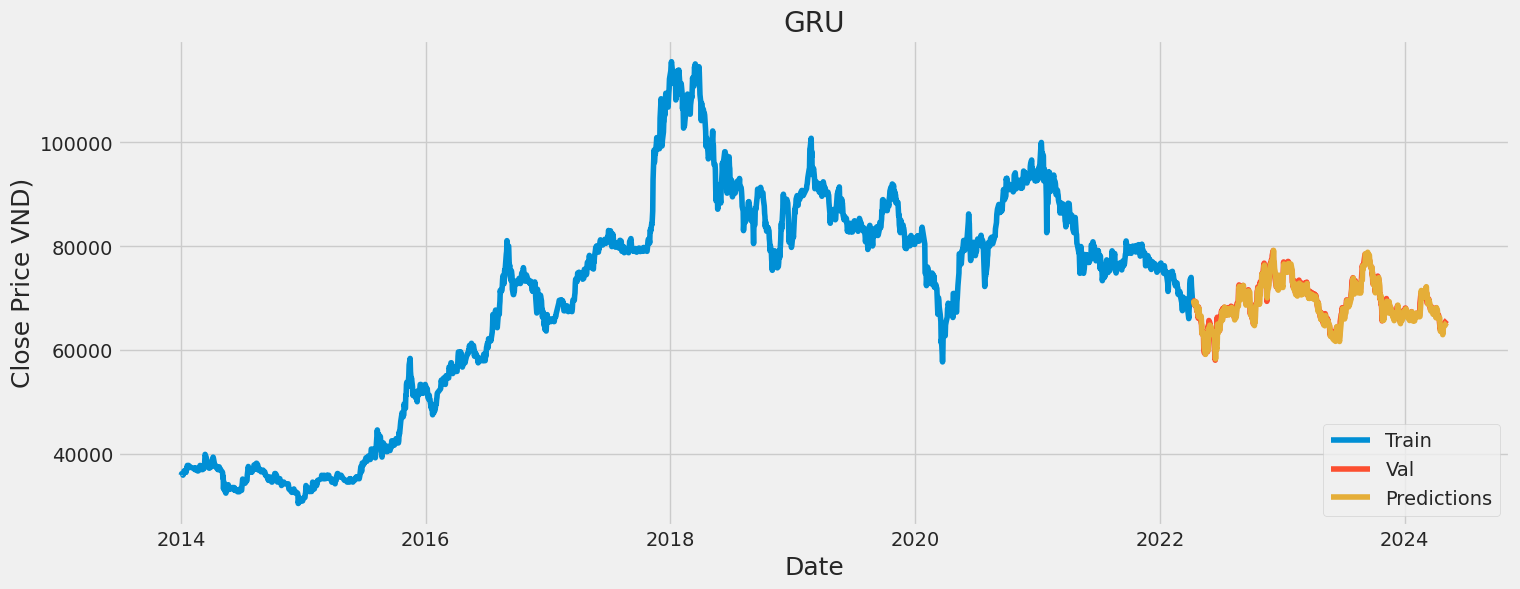

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('GRU')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()